# Altro

In [1]:
'''delta_z = z_max - z_min #uguale

delta_r = (delta_z * c) / H0 #uguale

V = (1/3) * (Omega * delta_r**3) #uguale

r_cyl = 0.5
h_cyl = 2000 / H0
cyl_vol = np.pi * (r_cyl**2) * h_cyl #uguale

n_density_mean = N / V * cyl_vol

print ('n_density_mean =', n_density_mean)

sigma_mean = n_density_mean / (np.pi * r_cyl**2)

print ('sigma_mean =', sigma_mean)'''

"delta_z = z_max - z_min #uguale\n\ndelta_r = (delta_z * c) / H0 #uguale\n\nV = (1/3) * (Omega * delta_r**3) #uguale\n\nr_cyl = 0.5\nh_cyl = 2000 / H0\ncyl_vol = np.pi * (r_cyl**2) * h_cyl #uguale\n\nn_density_mean = N / V * cyl_vol\n\nprint ('n_density_mean =', n_density_mean)\n\nsigma_mean = n_density_mean / (np.pi * r_cyl**2)\n\nprint ('sigma_mean =', sigma_mean)"

# Intro

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#from astropy.coordinates import Polygon
H_0 = 70 # km/s/Mpc
c = 3 * 10**5 # km/s

In [3]:
sdss = fits.open('SDSS_EnvCatalogue.fits')
data = sdss[1].data
header = sdss[1].header
print (header)
print (sdss[1].columns)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional table                            NAXIS1  =                  104 / width of table in bytes                        NAXIS2  =                19344 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group                                 TFIELDS =                   18 / number of columns                              EXTNAME = 'Joined  '           / table name                                     TTYPE1  = 'OBJID   '           / label for column 1                             TFORM1  = 'K       '           / format for column 1                            TTYPE2  = 'Ra      '           / label for column 2                             TFORM2  = 'D       '           / format 

# Part 1

## Task 1

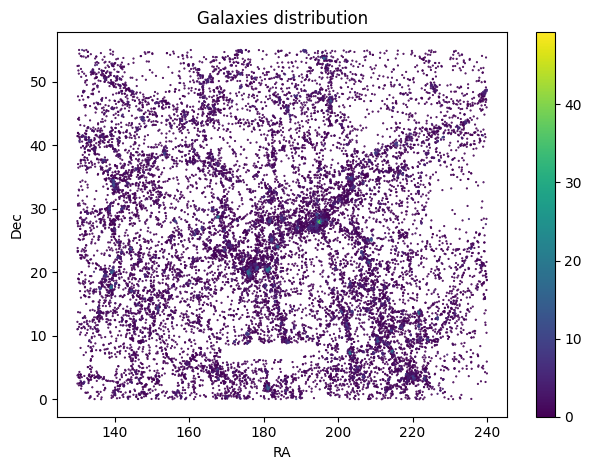

In [4]:
RA = data['RA']
Dec = data['Dec']
dens = data['dens_05']

plt.scatter (RA, Dec, s=0.3, c=dens, alpha=1)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Galaxies distribution')
plt.tight_layout()
plt.colorbar()
plt.show()

In [5]:
z = data['redshift']

z_min = np.min(z)
z_max = np.max(z)

N = len(RA)

A = np.radians (min(RA))
B = np.radians (max(RA))
C = np.radians (min(Dec))
D = np.radians (max(Dec))

Omega = (np.sin(D)-np.sin(C)) * (B-A)

#den = Omega * ((z_max*c)/H_0)

#mean_density = N / den

print ('Omega =', Omega)
#print ('mean density =', mean_density)

Omega = 1.5720199028463313


In [6]:
z = data['redshift']

z_min = np.min(z)
z_max = np.max(z)

r_min = (z_min * c) / H_0
r_max = (z_max * c) / H_0

V = (1/3) * (Omega * r_max**3) - (1/3) * (Omega * r_min**3)

print ('V', V)

r_cyl = 0.5
h_cyl = 2000 / H_0
cyl_vol = np.pi * (r_cyl**2) * h_cyl

n_density_mean = (N / V) * cyl_vol

print ('n_density_mean =', n_density_mean) #mean of number density galaxies over the cylinders

sigma_mean = n_density_mean / (np.pi * r_cyl**2)

print ('sigma_mean =', sigma_mean) #mean of surface density galaxies over the cylinders

V 974369.4033392225
n_density_mean = 0.4454966909350748
sigma_mean = 0.5672240039471962


In [7]:
delta = dens / sigma_mean
print (np.mean (delta))

3.757822973103572


## Task 2

In [8]:
log_delta = np.log10(1 + delta)
print (log_delta)
print (np.max(log_delta))


[0.         0.6113454  1.09185919 ... 0.         0.78179432 1.13258749]
1.9434673286015451


In [9]:
bin1 = np.where (log_delta == 0.)
group2 = np.where (log_delta > 0.)
print (len(bin1[0]), 'galaxies with 0 overdensity')
print (len(group2[0]), 'galaxies with >0 overdensity')

pos_delta = log_delta[group2] #overdensity >0
perc_edges = np.percentile(pos_delta,  np.linspace (0, 100, 4))

bin2 = np.where ((pos_delta >= perc_edges[0]) & (pos_delta < perc_edges[1]))
bin3 = np.where ((pos_delta >= perc_edges[1]) & (pos_delta < perc_edges[2]))
bin4 = np.where ((pos_delta >= perc_edges[2]) & (pos_delta < perc_edges[3]))

delta_bins = [0., 0.01, perc_edges[0], perc_edges[1], perc_edges[2], perc_edges[3]]


10643 galaxies with 0 overdensity
8701 galaxies with >0 overdensity


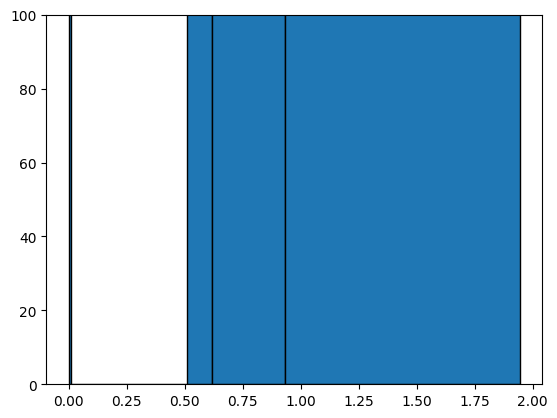

In [10]:
plt.hist (log_delta, bins = delta_bins, edgecolor = 'black')
plt.ylim (0, 100)
plt.show()

In [11]:
mass = data['mass']

u = data['up']
g = data['gp']

col_ug = u - g

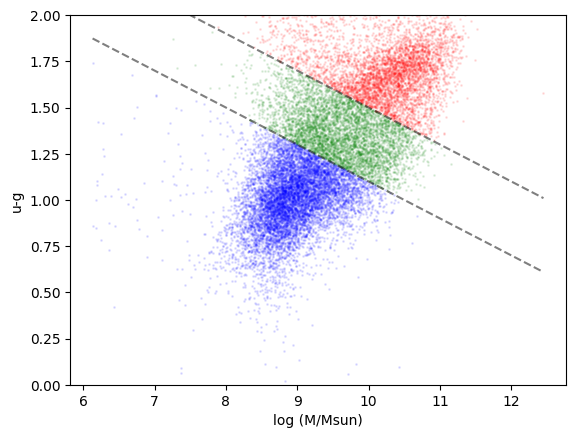

In [12]:
q1 = 3.5
q2 = 3.1
m = -0.2
x = np.linspace (min(mass), max(mass), 10)

def func (x, q, m):
    return q + x*m

blue_cloud = np.where (col_ug < func(mass, q2, m))
red_sequence = np.where (col_ug > func(mass, q1, m))
green_valley = np.where ((col_ug > func(mass, q2, m)) & (col_ug < func(mass, q1, m)))

#plt.scatter (mass, col_ug, s=1, alpha=0.1, c='black')
plt.plot (x, func(x, q1, m), c='black', linestyle = 'dashed', alpha = 0.5)
plt.plot (x, func(x, q2, m), c='black', linestyle = 'dashed', alpha = 0.5)
plt.scatter (mass[blue_cloud], col_ug[blue_cloud], s=1, alpha=0.1, c='blue')
plt.scatter (mass[red_sequence], col_ug[red_sequence], s=1, alpha=0.1, c='red')
plt.scatter (mass[green_valley], col_ug[green_valley], s=1, alpha=0.1, c='green')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

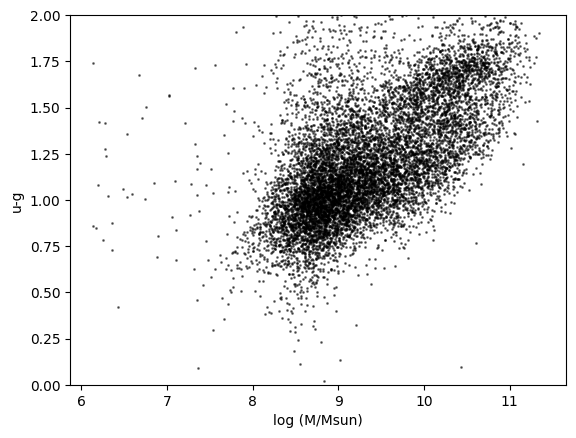

In [13]:
plt.scatter (mass [bin1], col_ug [bin1], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

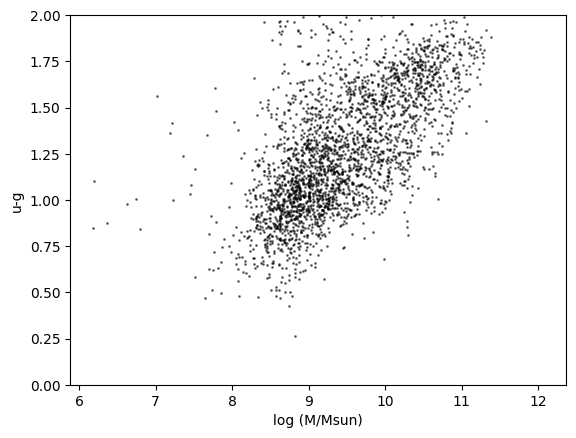

In [14]:
plt.scatter (mass [bin2], col_ug [bin2], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

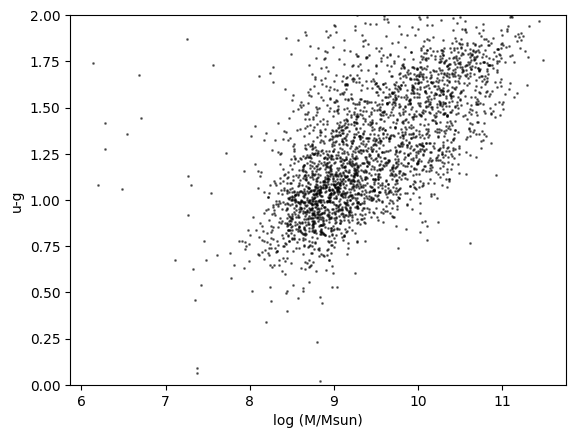

In [15]:
plt.scatter (mass [bin3], col_ug [bin3], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

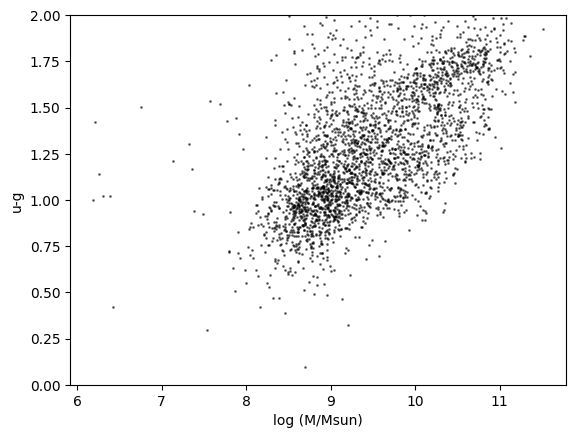

In [16]:
plt.scatter (mass [bin4], col_ug [bin4], s=1, alpha=0.5, c='black')
plt.ylim (0, 2)
plt.xlabel ('log (M/Msun)')
plt.ylabel ('u-g')
plt.show()

## Task 3

In [17]:
#FARE ISTOGRAMMA

blue_iso = np.intersect1d (blue_cloud, bin1)
red_iso = np.intersect1d (red_sequence, bin1)
green_iso = np.intersect1d (green_valley, bin1)

print ('ISOLATED GALAXIES')
print (100*len(blue_iso)/len(bin1[0]), 'blue galaxies')
print (100*len(red_iso)/len(bin1[0]), 'red galaxies')
print (100*len(green_iso)/len(bin1[0]), 'green galaxies')
print ('\n')

blue_low = np.intersect1d (blue_cloud, bin2)
red_low = np.intersect1d (red_sequence, bin2)
green_low = np.intersect1d (green_valley, bin2)

print ('LOW DENSITY GALAXIES')
print (100*len(blue_low)/len(bin2[0]), 'blue galaxies')
print (100*len(red_low)/len(bin2[0]), 'red galaxies')
print (100*len(green_low)/len(bin2[0]), 'green galaxies')
print ('\n')

blue_med = np.intersect1d (blue_cloud, bin3)
red_med = np.intersect1d (red_sequence, bin3)
green_med = np.intersect1d (green_valley, bin3)

print ('MEDIUM DENSITY GALAXIES')
print (100*len(blue_med)/len(bin3[0]), 'blue galaxies')
print (100*len(red_med)/len(bin3[0]), 'red galaxies')
print (100*len(green_med)/len(bin3[0]), 'green galaxies')
print ('\n')

blue_high = np.intersect1d (blue_cloud, bin4)
red_high = np.intersect1d (red_sequence, bin4)
green_high = np.intersect1d (green_valley, bin4)

print ('HIGH DENSITY GALAXIES')
print (100*len(blue_high)/len(bin4[0]), 'blue galaxies')
print (100*len(red_high)/len(bin4[0]), 'red galaxies')
print (100*len(green_high)/len(bin4[0]), 'green galaxies')
print ('\n')


ISOLATED GALAXIES
56.158977731842526 blue galaxies
20.52992577280842 red galaxies
23.311096495349055 green galaxies


LOW DENSITY GALAXIES
47.99721351445489 blue galaxies
27.83002438174852 red galaxies
24.172762103796586 green galaxies


MEDIUM DENSITY GALAXIES
48.122866894197955 blue galaxies
26.757679180887372 red galaxies
25.119453924914676 green galaxies


HIGH DENSITY GALAXIES
45.98137288720248 blue galaxies
27.69920662297344 red galaxies
26.319420489824076 green galaxies




# Part 2

In [31]:
spec2 = fits.open('Spec_N4330_region1 (1).fits')
spec2flx = spec2[0].data
spec2err = spec2[1].data
spec2wav = spec2[2].data

print (spec2flx.shape)
print (spec2err.shape)
print (spec2wav.shape)


table = fits.open('Phot_N4330 (1).fits')
tabdata = table[1].data

print (tabdata.columns)

(2400,)
(2400,)
(2400,)
ColDefs(
    name = 'id'; format = 'K'; null = -9223372036854775808
    name = 'z_best'; format = 'D'
    name = 'dl'; format = 'D'
    name = 'f_FUV'; format = 'D'
    name = 'e_FUV'; format = 'D'
    name = 'f_NUV'; format = 'D'
    name = 'e_NUV'; format = 'D'
    name = 'f_U'; format = 'D'
    name = 'e_U'; format = 'D'
    name = 'f_G'; format = 'D'
    name = 'e_G'; format = 'D'
    name = 'f_I'; format = 'D'
    name = 'e_I'; format = 'D'
    name = 'f_Z'; format = 'D'
    name = 'e_Z'; format = 'D'
    name = 'f_IRAC1'; format = 'D'
    name = 'e_IRAC1'; format = 'D'
    name = 'f_IRAC4'; format = 'D'
    name = 'e_IRAC4'; format = 'D'
    name = 'f_PACS100'; format = 'D'
    name = 'e_PACS100'; format = 'D'
)


In [32]:
mean_flux = np.mean(spec2flx)

#Read model
modhdu = fits.open('Models_N4330_region1 (1).fits')
#How many extensions
Next = modhdu[0].header['NEXT']
modwave = modhdu[0].data
chi2 = np.zeros (Next)
consts = np.zeros (Next)
for ext in np.arange(1,Next+1):
    thisext = modhdu[ext]
    thishead = thisext.header
    modspec = thisext.data
    Qtau = thishead['TRUNCTAU']
    Qage = thishead['TRUNCAGE']
    photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],\
    thishead['MODU'],thishead['MODG'],\
    thishead['MODI'],thishead['MODZ'], \
    thishead['MODIR1'],thishead['MODIR4']))

    mean_mod = np.mean(modspec.flatten())

    const = mean_flux / mean_mod
    consts[ext-1] = const
    modspec2 = modspec * const

    chi2[ext-1] = np.sum((spec2flx - modspec2)**2 / (spec2err**2))

## Task 1

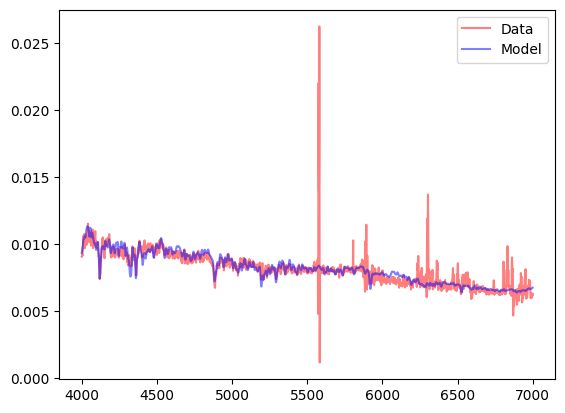

In [33]:
plt.plot (spec2wav, spec2flx, c='red', alpha=0.5, label='Data')
plt.plot (modwave.flatten(), modspec2.flatten(), c='blue', alpha=0.5, label='Model')
plt.legend()
plt.show()

## Task 2

In [34]:
print (chi2)

best = np.where(chi2 == np.min(chi2))[0][0]

print (best)

[ 3245.34042269  3076.40096876  3091.15351766  3106.65768601
  3111.54741142  3106.59302429  3082.63313061  3063.57706271
  3059.84788548  3098.8719517   3175.14602566  5148.11909029
  3679.59209842  3225.491864    3098.32282231  3072.59071949
  3081.07961325  3081.95751406  3065.48985486  3059.2730365
  3093.44748577  3168.12754715  7784.40963082  5244.49052994
  4022.38275469  3458.50553706  3211.05622819  3073.89097335
  3067.08127433  3062.51665223  3057.77258912  3088.0347268
  3160.84862703  9984.40352671  7073.95264749  5323.01954014
  4296.05106351  3709.81922769  3211.70115453  3053.95931441
  3052.39321726  3053.23327647  3082.41446117  3153.25958547
 11653.09300687  8719.81899583  6725.20393805  5388.73933571
  4508.08764694  3576.97992873  3089.14698604  3041.60949037
  3044.32011229  3076.23931147  3145.33133448 12839.81804827
 10017.81109317  7962.00528262  6475.05511337  5409.57467602
  4125.42103447  3225.64209855  3054.49157214  3034.46722613
  3067.71409997  3136.4324

In [35]:
best_ext = modhdu[best + 1]
best_Qage = best_ext.header["TRUNCAGE"]
best_Qtau = best_ext.header["TRUNCTAU"]

print ('Best Q age', best_Qage, 'Myr')
print ('Best Q tau', best_Qtau)


Best Q age 500 Myr
Best Q tau 120


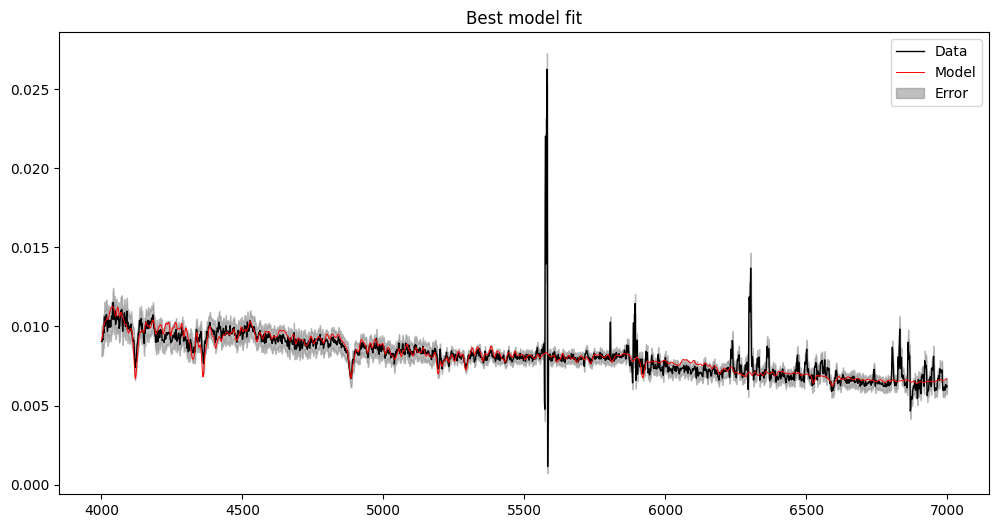

In [36]:
best_spec = best_ext.data
plt.figure(figsize=(12,6))
plt.plot (spec2wav, spec2flx, c='black', alpha=1, label='Data', linewidth=1)
plt.plot (modwave.flatten(), consts[best]*best_spec.flatten(), c='red', alpha=1, label='Model', linewidth=0.7)
#plt.plot (spec2wav, spec2flx+spec2err, c='gray', alpha=1, linewidth=0.7)
#plt.plot (spec2wav, spec2flx-spec2err, c='gray', alpha=1, linewidth=0.7)
plt.fill_between (spec2wav, spec2flx-spec2err, spec2flx+spec2err, color='gray', alpha=0.5, label='Error')
plt.title ('Best model fit')
plt.legend()
plt.show()

In [37]:
print (f" Reduced chi2: {chi2.min()/len(spec2flx):.3f}")

 Reduced chi2: 1.264


# Task 3

In [38]:
print (tabdata.columns)

ColDefs(
    name = 'id'; format = 'K'; null = -9223372036854775808
    name = 'z_best'; format = 'D'
    name = 'dl'; format = 'D'
    name = 'f_FUV'; format = 'D'
    name = 'e_FUV'; format = 'D'
    name = 'f_NUV'; format = 'D'
    name = 'e_NUV'; format = 'D'
    name = 'f_U'; format = 'D'
    name = 'e_U'; format = 'D'
    name = 'f_G'; format = 'D'
    name = 'e_G'; format = 'D'
    name = 'f_I'; format = 'D'
    name = 'e_I'; format = 'D'
    name = 'f_Z'; format = 'D'
    name = 'e_Z'; format = 'D'
    name = 'f_IRAC1'; format = 'D'
    name = 'e_IRAC1'; format = 'D'
    name = 'f_IRAC4'; format = 'D'
    name = 'e_IRAC4'; format = 'D'
    name = 'f_PACS100'; format = 'D'
    name = 'e_PACS100'; format = 'D'
)


In [39]:
phot_tab2 = tabdata [0]
print (phot_tab2)

phot2 = np.zeros (8)
phot2_err = np.zeros (8)

for i in range (len(phot2)):
    phot2[i] = phot_tab2[3+(2*i)]
    phot2_err[i] = phot_tab2[4+(2*i)]
print (phot2)
print (phot2_err)

(1, 0.0046705, 16.5, 0.07, 0.0025, 0.111, 0.005, 0.513, 0.035, 1.203, 0.054, 2.191, 0.117, 2.528, 0.181, 1.329, 0.11, 0.341, 0.197, 0.1, 23.55)
[0.07  0.111 0.513 1.203 2.191 2.528 1.329 0.341]
[0.0025 0.005  0.035  0.054  0.117  0.181  0.11   0.197 ]


In [40]:
chi2_phot = np.zeros(Next)

for ext in np.arange(1,Next+1):
    thisext = modhdu[ext]
    thishead = thisext.header
    modspec = thisext.data
    photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],\
    thishead['MODU'],thishead['MODG'],\
    thishead['MODI'],thishead['MODZ'], \
    thishead['MODIR1'],thishead['MODIR4']))

    chi2_phot[ext-1] = np.sum((photarr - phot2)**2 / (phot2_err**2))

In [41]:
print (chi2_phot/8)

ind_min = np.argmin(chi2_phot/8)

print ((chi2_phot/8)[ind_min])

print (ind_min)

[2.07713333e+03 6.04124485e+02 1.80081643e+02 4.87617315e+01
 1.11130347e+01 1.51042032e+01 6.91198298e+01 1.05562952e+02
 1.26635938e+02 1.51558773e+02 1.64996323e+02 5.62643210e+03
 2.26087365e+03 9.00943026e+02 3.42303825e+02 1.15339332e+02
 5.71275135e+00 4.99059831e+01 9.61783997e+01 1.21817319e+02
 1.49972985e+02 1.64006192e+02 9.29369224e+03 4.68484921e+03
 2.30139430e+03 1.09355353e+03 4.92390972e+02 6.97050177e+01
 2.07784885e+01 7.80631715e+01 1.13064787e+02 1.47929324e+02
 1.62928343e+02 1.21650970e+04 7.14887910e+03 4.09676565e+03
 2.28767329e+03 1.23612866e+03 3.07205250e+02 1.71335943e+00
 4.99218048e+01 9.73674895e+01 1.44771239e+02 1.61664682e+02
 1.43357566e+04 9.31056241e+03 5.91914042e+03 3.68848727e+03
 2.24728515e+03 7.60893224e+02 3.17935204e+01 1.80925473e+01
 7.26381234e+01 1.39500048e+02 1.60060918e+02 1.58900849e+04
 1.10194590e+04 7.51156297e+03 5.04395664e+03 3.33425496e+03
 1.37563843e+03 1.48223197e+02 4.62370626e-01 3.90574534e+01
 1.28110953e+02 1.570011

500 160


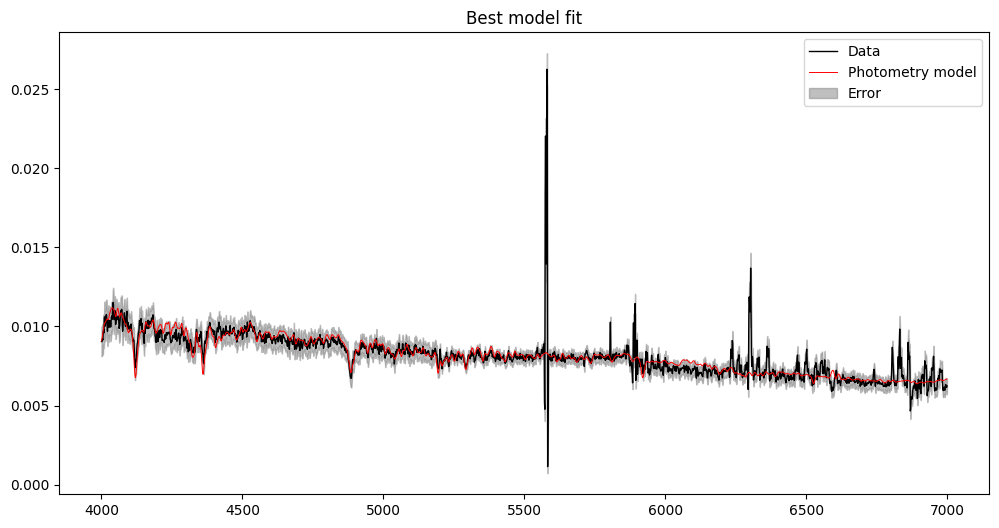

In [42]:
best_ext_phot = modhdu[ind_min+1]

Qage_phot = best_ext_phot.header['TRUNCAGE']
Qtau_phot = best_ext_phot.header['TRUNCTAU']

print (Qage_phot, Qtau_phot)

best_spec_phot = best_ext_phot.data
plt.figure(figsize=(12,6))
plt.plot (spec2wav, spec2flx, c='black', alpha=1, label='Data', linewidth=1)
plt.plot (modwave.flatten(), consts[ind_min]*best_spec_phot.flatten(), c='red', alpha=1, label='Photometry model', linewidth=0.7)
#plt.plot (spec2wav, spec2flx+spec2err, c='gray', alpha=1, linewidth=0.7)
#plt.plot (spec2wav, spec2flx-spec2err, c='gray', alpha=1, linewidth=0.7)
plt.fill_between (spec2wav, spec2flx-spec2err, spec2flx+spec2err, color='gray', alpha=0.5, label='Error')
plt.title ('Best model fit')
plt.legend()
plt.show()

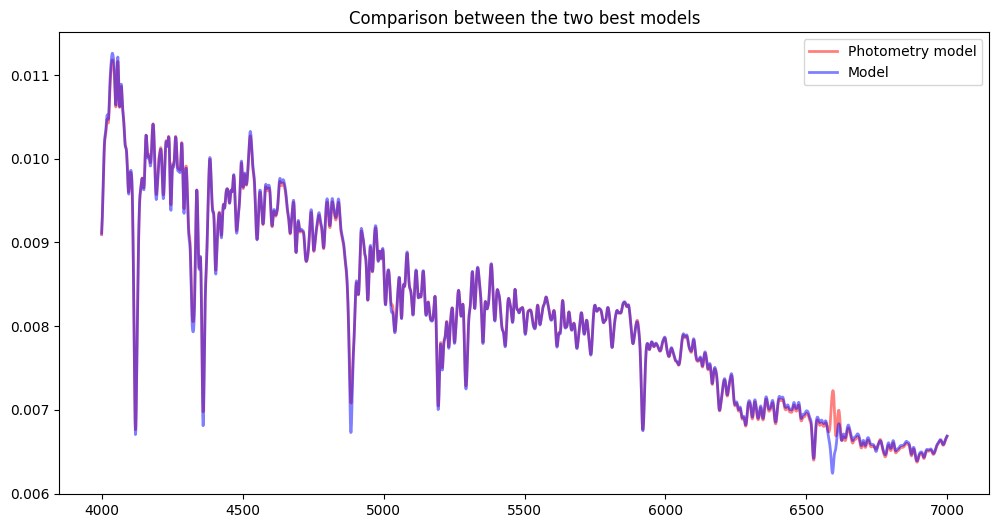

In [43]:
plt.figure(figsize=(12,6))
plt.plot (modwave.flatten(), consts[ind_min]*best_spec_phot.flatten(), c='red', alpha=0.5, label='Photometry model', linewidth=2)
plt.plot (modwave.flatten(), consts[best]*best_spec.flatten(), c='blue', alpha=0.5, label='Model', linewidth=2)
plt.title ('Comparison between the two best models')
plt.legend()
plt.show()